## ODEs (Differential Equations.jl)

[DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/getting_started/) is one of the main selling points of using Julia. For a comparison with packages in other languages see [this blog post](https://www.stochasticlifestyle.com/comparison-differential-equation-solver-suites-matlab-r-julia-python-c-fortran/), and why you should not write your own solver see [this](https://nextjournal.com/ChrisRackauckas/why-you-shouldnt-use-eulers-method-to-solve-odes). For benchmarks comparing differential equations packages in multiple languages see [this](https://docs.sciml.ai/SciMLBenchmarksOutput/stable/MultiLanguage/ode_wrapper_packages/). The benchmarks show that the solvers in DifferentialEquations.jl are better.

In [4]:
using DifferentialEquations
using Plots

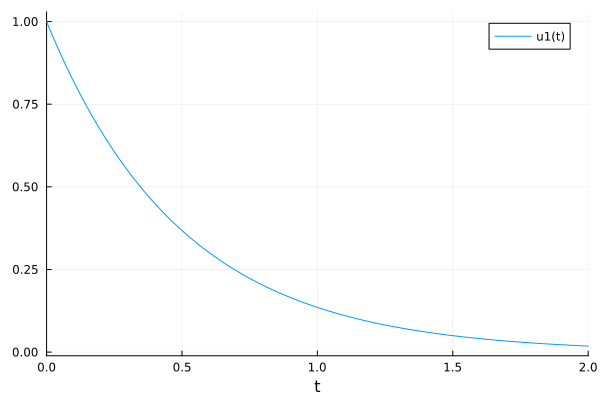

In [5]:

function simple_ode(dy, y, p, t)
    dy[1] = -2 * y[1]
end

y₀ = [1.0]
tspan = (0.0, 2.0)
prob = ODEProblem(simple_ode, y₀, tspan)

sol = solve(prob)

plot(sol)

#### Solving Lorenz

$$
dx/dt = \sigma(y-x) \\
dy/dt = x(\rho-z) - y \\
dz/dt = xy - \beta*z \\
$$

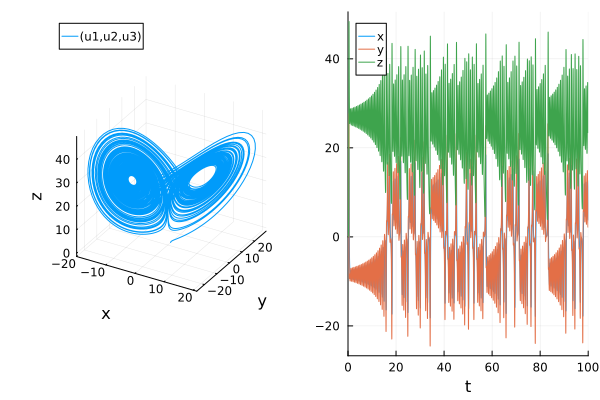

In [10]:
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end
u₀ = [1.0, 0.0, 0.0]
tspan = (0.0, 100.0)
p = (10.0, 28.0, 8/3)
prob = ODEProblem(lorenz!, u₀, tspan, p)

sol = solve(prob)

plot1 = plot(sol, 
             vars = (1,2,3), 
             xlabel="x",  
             ylabel="y", 
             zlabel="z",)
plot2 = plot(sol, label = ["x" "y" "z"])
plot(plot1, plot2, layout = (1, 2))

Let's solve this in Float16 now.

In [12]:
u0 = Float16[1.0, 0.0, 3.0]
tspan = Float16[0.0, 100.0]
p = Float16[10.0, 28.0, 8/3]

3-element Vector{Float16}:
 1.0
 0.0
 3.0